# <font color = gold>Практическая работа №2 </font>

## <font color = pink>*Выполнил студент группы ММР 211 Инжутов Павел Игорвеич*</font>

*****

<div class='alert alert-block alert-success'>
<b>Загружаем встроенные библиотеки</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import scipy.stats
import math

<div class='alert alert-block alert-success'>
<b>Загружаем датасет из файла Excel, скаченный с сайта Единой межведомственной информационно-статистическаой системы России (ЕМИСС) и просматриваем его часть</b>
</div>

### Продажа алкогольных напитков в натуральном выражении по субъектам Российской Федерации с 2010 г. оп 2016 г.

[https://www.fedstat.ru/indicator/40619](https://www.fedstat.ru/indicator/40619)

In [2]:
alco = pd.read_excel('/Users/inzutov/Yandex.Disk.localized/ВШЭ/Data science/Rabota_2/data.xls')

In [3]:
alco

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016
0,Белгородская область,Вина виноградные специальные,40.8,90.0,43.3,NaN,NaN,NaN,NaN
1,Белгородская область,Вина виноградные столовые,345.4,361.5,382.8,NaN,NaN,NaN,NaN
2,Белгородская область,Вина игристые и шампанские,142.8,181.2,193.3,206.0,181.8,165.2,138.9
3,Белгородская область,"Вина плодовые (включая сидры, медовые вина и н...",37.2,43.3,23.9,NaN,NaN,NaN,NaN
4,Белгородская область,Вино,NaN,NaN,403.5,373.3,341.8,314.1,287.1
...,...,...,...,...,...,...,...,...,...
1719,Чукотский автономный округ,"Напитки винные (виноградные и плодовые, в том ...",0.3,0.6,0.9,NaN,NaN,5.5,NaN
1720,Чукотский автономный округ,Напитки слабоалкогольные (с содержанием этилов...,27.8,15.8,8.4,1.6,0.7,0.2,0.0
1721,Чукотский автономный округ,"Напитки, изготавливаемые на основе пива",NaN,NaN,NaN,4.0,5.6,5.9,2.2
1722,Чукотский автономный округ,"Пиво, кроме коктейлей пивных и напитка солодового",89.8,85.7,122.0,136.7,165.1,158.6,169.8


In [4]:
alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1724 entries, 0 to 1723
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Субъект РФ  1724 non-null   object 
 1   Продукция   1724 non-null   object 
 2   2010        1079 non-null   float64
 3   2011        1079 non-null   float64
 4   2012        1411 non-null   float64
 5   2013        1190 non-null   float64
 6   2014        1218 non-null   float64
 7   2015        1305 non-null   float64
 8   2016        1218 non-null   float64
dtypes: float64(7), object(2)
memory usage: 121.3+ KB


### Методика расчета
Приводятся данные о продаже алкогольных напитков населению в натуральном выражении. Информация представляется в декалитрах - один декалитр равен 10 литрам. Данные по строке Российская Федерация приводятся в млн. декалитров.

### Комментарии
С 2017 года субъектом официального статистического учета, осуществляющим формирование и предоставление пользователям официальной статистической информации об объеме розничной продажи алкогольной продукции, является Росалкогольрегулирование. Информацию с 2017 г. см. в разделе 60.Федеральная служба по регулированию алкогольного рынка / 60.08 и 60.10.

#### Единицы измерения
тысяча декалитров
#### Период действия
с 01.01.2010 по 31.12.2016

<div class='alert alert-block alert-success'>
<b>Выберем наиболее популярные позиции в России для дальнейшего анализа</b>
</div>

In [5]:
alco_top = alco
alco_top['c 2010 по 2016'] = alco_top.loc[:,'2010':'2016'].sum(axis=1)
alco_top['c 2010 по 2016']=round(alco_top['c 2010 по 2016'], 3)
warnings.filterwarnings("ignore")

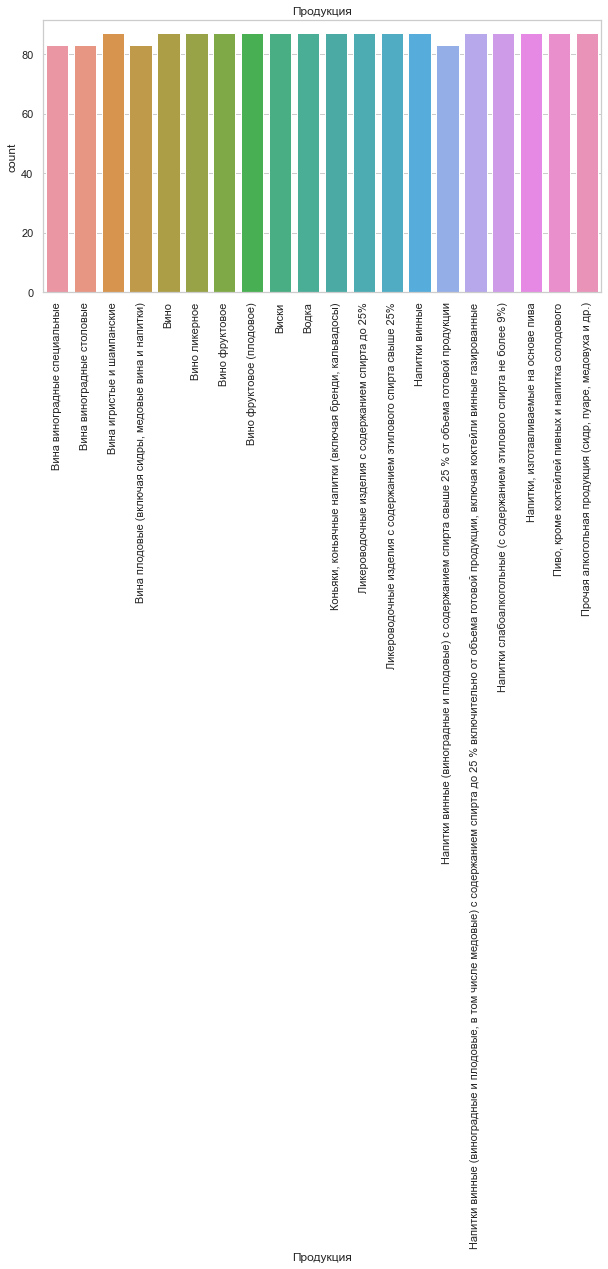

In [6]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plt.title("Продукция")
ax = sns.countplot(x="Продукция", data=alco)

In [7]:
alco_top = alco_top.sort_values('c 2010 по 2016', ascending=False)
alco_top.head(10)

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016,c 2010 по 2016
358,Город Москва столица Российской Федера...,"Пиво, кроме коктейлей пивных и напитка солодового",100654.5,105677.7,107127.6,111426.0,100751.2,97520.2,85538.3,708695.5
198,Московская область,"Пиво, кроме коктейлей пивных и напитка солодового",71105.4,77704.3,70715.8,70194.6,70194.6,69024.4,73060.3,501999.4
1206,Свердловская область,"Пиво, кроме коктейлей пивных и напитка солодового",39337.0,39591.4,39155.9,39585.7,31881.6,27672.0,24030.0,241253.6
670,Краснодарский край,"Пиво, кроме коктейлей пивных и напитка солодового",28810.8,31505.7,33476.5,34400.2,36246.6,34536.5,35198.7,234175.0
594,Город Санкт-Петербург город федерально...,"Пиво, кроме коктейлей пивных и напитка солодового",55070.6,40855.6,38551.1,22429.8,21578.0,18812.0,17713.4,215010.5
1226,Тюменская область,"Пиво, кроме коктейлей пивных и напитка солодового",29646.9,29740.7,29809.3,29475.0,27749.5,27244.0,26693.3,200358.7
966,Республика Татарстан (Татарстан),"Пиво, кроме коктейлей пивных и напитка солодового",29715.2,31808.0,33219.9,30612.8,27280.1,24697.0,22896.0,200229.0
906,Республика Башкортостан,"Пиво, кроме коктейлей пивных и напитка солодового",32405.2,25981.8,31803.2,36716.7,30567.7,17117.4,25195.9,199787.9
1302,Челябинская область,"Пиво, кроме коктейлей пивных и напитка солодового",37874.2,29839.9,26881.2,27842.3,18830.6,15261.1,14903.4,171432.7
730,Ростовская область,"Пиво, кроме коктейлей пивных и напитка солодового",20350.8,20778.7,21634.7,22353.3,23350.2,23440.0,23434.4,155342.1


Из графика видим наиболее ТОПовые категории в порядке убывания по продажам в миллионах декалитров

#### Для анализа выбраны 7 топовых категории по России:
<ol>
<li>Пиво</li>
<li>Водка</li>
<li>Вино</li>
<li>Пивные напитки</li>
<li>Вина игристые и шампанские</li>
<li>Вина виноградные столовые</li>
<li>Слабоалкогольные напитки</li>
</ol>

<div class='alert alert-block alert-success'>
<b>Приводим датафрйм в вид, необходимый нам для анализа</b>
</div>

In [8]:
alco.loc[alco["Продукция"] == "Пиво, кроме коктейлей пивных и напитка солодового", "Продукция"] = 'Пиво'
alco.loc[alco["Продукция"] == "Напитки, изготавливаемые на основе пива", "Продукция"] = 'Пивные напитки'
alco.loc[alco["Продукция"] == "Напитки слабоалкогольные (с содержанием этилового спирта не более 9%)", "Продукция"] = 'Слабоалкогольные напитки'

In [9]:
alco = alco[(alco['Продукция'] == 'Пиво') | (alco['Продукция'] =='Водка') | (alco['Продукция'] =='Вино') | (alco['Продукция'] =='Пивные напитки') | (alco['Продукция'] =='Вина игристые и шампанские') | (alco['Продукция'] =='Вина виноградные столовые') | (alco['Продукция'] =='Слабоалкогольные напитки')]

In [10]:
alco['c 2010 по 2016'] = alco.loc[:,'2010':'2016'].sum(axis=1)
alco['c 2010 по 2016']=round(alco['c 2010 по 2016'], 3)

In [11]:
alco_top.loc[alco_top["Продукция"] == "Пиво, кроме коктейлей пивных и напитка солодового", "Продукция"] = 'Пиво'
alco_top.loc[alco_top["Продукция"] == "Напитки, изготавливаемые на основе пива", "Продукция"] = 'Пивные напитки'
alco_top.loc[alco_top["Продукция"] == "Напитки слабоалкогольные (с содержанием этилового спирта не более 9%)", "Продукция"] = 'Слабоалкогольные напитки'

#### Для анализа в таблице оставлены только округа, все значения в декалитрах, оставлены только 7 ТОПовых категорий по России и добавлен столбец суммы за 7 лет

In [12]:
alcoold=alco
alco

,Субъект РФ,Продукция,2010,2011,2012,2013,2014,2015,2016,c 2010 по 2016
1,Белгородская область,Вина виноградные столовые,345.4,361.5,382.8,NaN,NaN,NaN,NaN,1089.7
2,Белгородская область,Вина игристые и шампанские,142.8,181.2,193.3,206.0,181.8,165.2,138.9,1209.2
4,Белгородская область,Вино,NaN,NaN,403.5,373.3,341.8,314.1,287.1,1719.8
9,Белгородская область,Водка,940.1,1026.1,981.1,908.5,708.3,636.4,604.9,5805.4
16,Белгородская область,Слабоалкогольные напитки,220.7,121.0,47.8,55.5,46.7,29.1,32.0,552.8
...,...,...,...,...,...,...,...,...,...,...
1708,Чукотский автономный округ,Вино,NaN,NaN,20.9,18.1,16.8,17.0,16.3,89.1
1713,Чукотский автономный округ,Водка,78.4,71.7,67.0,64.2,53.6,52.5,44.9,432.3
1720,Чукотский автономный округ,Слабоалкогольные напитки,27.8,15.8,8.4,1.6,0.7,0.2,0.0,54.5
1721,Чукотский автономный округ,Пивные напитки,NaN,NaN,NaN,4.0,5.6,5.9,2.2,17.7


<AxesSubplot:>

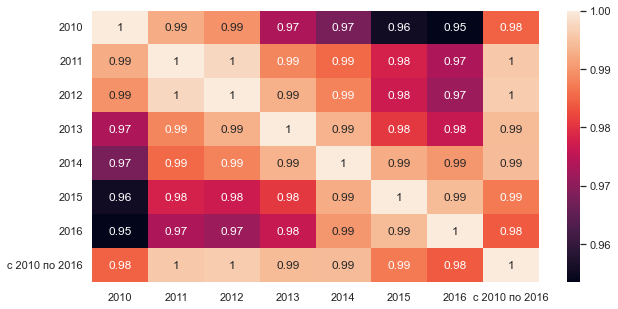

In [13]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
sns.heatmap(alco.corr(),annot=True)

#### Из тепловой карты видно, что потребление алкоголя коррелируются можду годами на высоком уровне

In [14]:
alco = alco.drop(columns='c 2010 по 2016') 
alco=alco.melt(id_vars=["Субъект РФ", "Продукция"], var_name="Год", value_name="Объем")
alco[['Год']] = alco[['Год']].apply(pd.to_numeric) 
alco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Субъект РФ  4235 non-null   object 
 1   Продукция   4235 non-null   object 
 2   Год         4235 non-null   int64  
 3   Объем       3404 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.5+ KB


In [15]:
alco=alco.dropna()

In [16]:
alco

,Субъект РФ,Продукция,Год,Объем
0,Белгородская область,Вина виноградные столовые,2010,345.4
1,Белгородская область,Вина игристые и шампанские,2010,142.8
3,Белгородская область,Водка,2010,940.1
4,Белгородская область,Слабоалкогольные напитки,2010,220.7
6,Белгородская область,Пиво,2010,5454.4
...,...,...,...,...
4230,Чукотский автономный округ,Вино,2016,16.3
4231,Чукотский автономный округ,Водка,2016,44.9
4232,Чукотский автономный округ,Слабоалкогольные напитки,2016,0.0
4233,Чукотский автономный округ,Пивные напитки,2016,2.2


<div class='alert alert-block alert-success'>
<b>Привели датафрйм в вид по наблюдениям, а также удалили пропущенные значения</b>
</div>

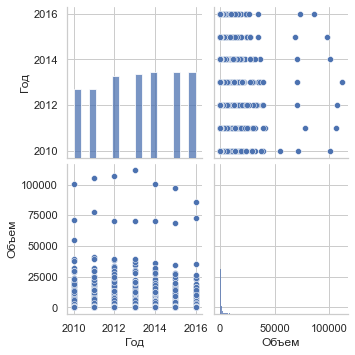

In [17]:
sns.pairplot(alco.iloc[:,:]);

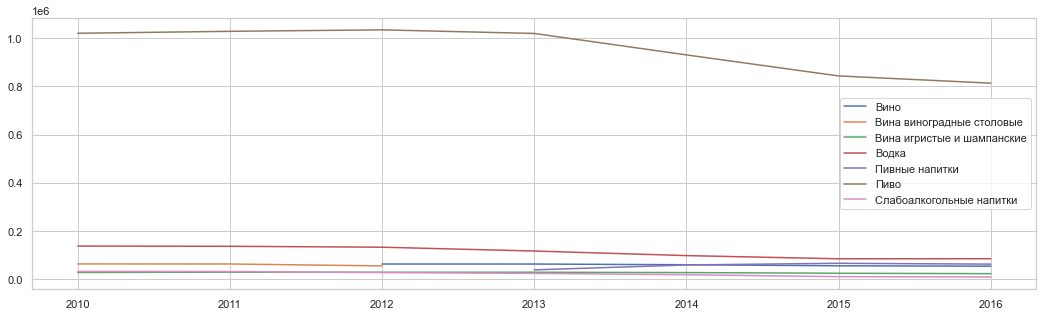

In [18]:
prod = alco.groupby(['Продукция', 'Год'])['Объем'].sum()
fig, ax = plt.subplots(figsize=(18,5))
ax.plot(prod.loc['Вино'])
ax.plot(prod.loc['Вина виноградные столовые'])
ax.plot(prod.loc['Вина игристые и шампанские'])
ax.plot(prod.loc['Водка'])
ax.plot(prod.loc['Пивные напитки'])
ax.plot(prod.loc['Пиво'])
ax.plot(prod.loc['Слабоалкогольные напитки'])
ax.legend(['Вино', 'Вина виноградные столовые', 'Вина игристые и шампанские', 'Водка', 'Пивные напитки', 'Пиво', 'Слабоалкогольные напитки'])

#### Видно на сколько сильно выше потребление пива по сравнению с остальными напитками. При этом потребление алкоголя уменьшается по всем категориям, кроме пивных напитков.

In [19]:
subset1 = ['Субъект РФ']
que = alco.duplicated(subset=subset1,keep=False)
df = alco[que].groupby(subset1)['Объем'].sum()
alco_sub = alco.groupby(subset1)['Объем'].sum().reset_index()
alco_sub = alco_sub.sort_values('Объем', ascending=False)

<AxesSubplot:ylabel='Субъект РФ'>

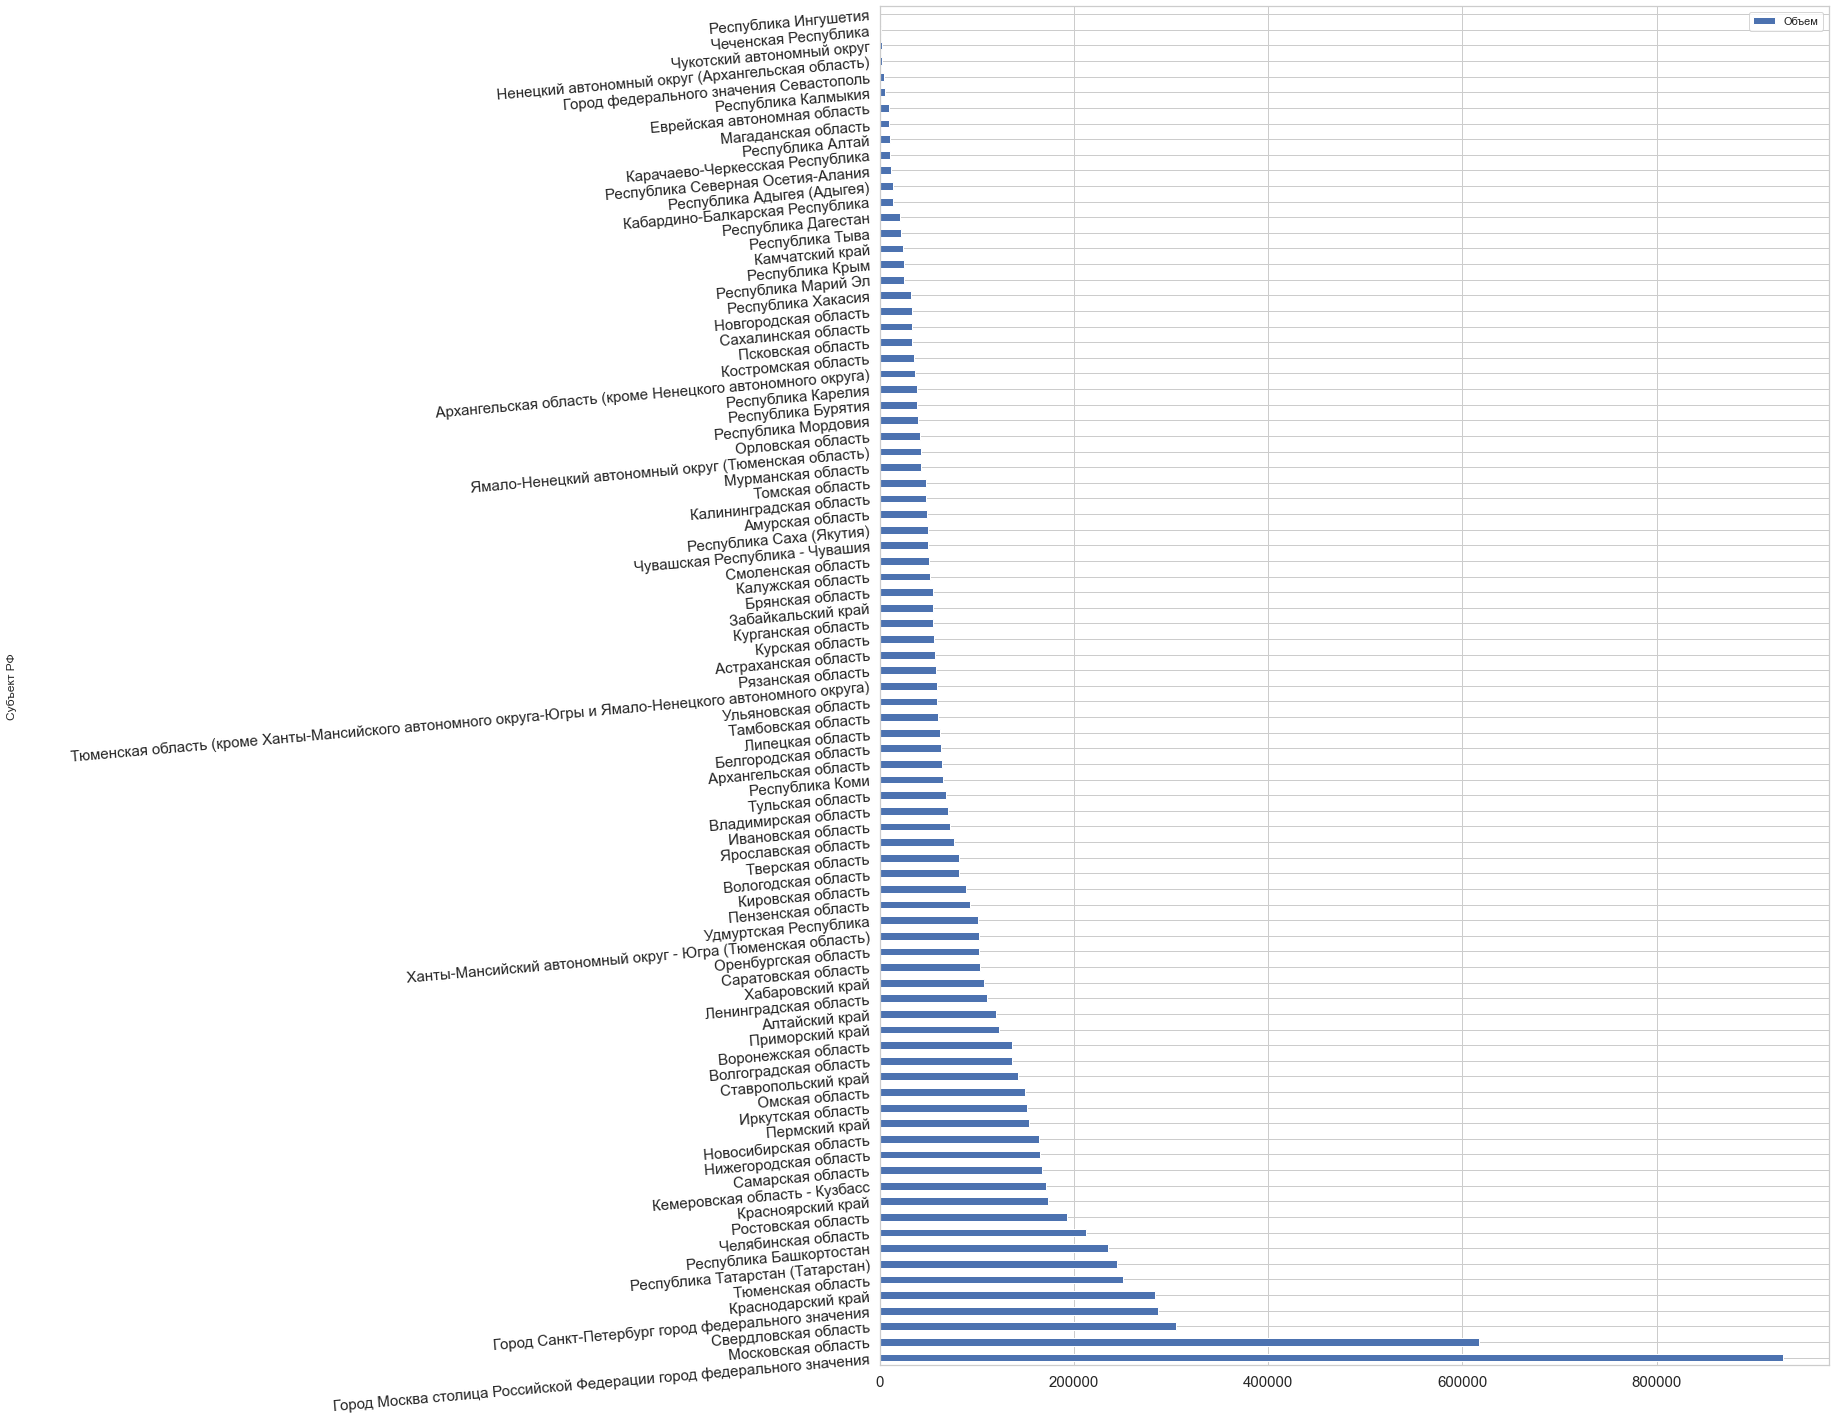

In [20]:
alco_sub.plot(x="Субъект РФ", y="Объем", kind="barh", rot=5, fontsize=15, figsize=(17,25))

#### Выявлены субъектов с самым высоким уровнем потребления алкоголя. ТОП-8:
* Москва
* Московская область
* Свердловская область
* Санкт-Петербург
* Краснодарский край
* Тюменская область
* Татарстан
* Башкортостан

In [21]:
subset2 = ['Год']
que2 = alco.duplicated(subset=subset2,keep=False)
df2 = alco[que2].groupby(subset2)['Объем'].sum()
alco_god = alco.groupby(subset2)['Объем'].sum().reset_index()
alco_god = alco_god.sort_values('Объем', ascending=False)

<AxesSubplot:xlabel='Год'>

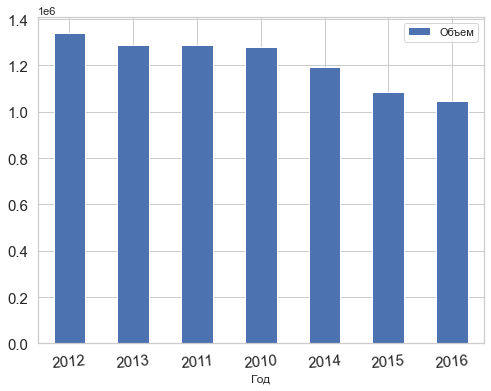

In [22]:
alco_god.plot(x="Год", y="Объем", kind="bar", rot=5, fontsize=15, figsize=(8,6))

#### Наблюдается тенденция общее уменьшения потребления алкогольных напитков. Особенно заметно сниженине в 2014 и 2015 годах

### Проверим гипотнезу: Алкогольные нипитки до 10 градусов пьют столько же, сколько и выше 10 градусов

In [23]:
subset3 = ['Продукция']
que3 = alco.duplicated(subset=subset3,keep=False)
df3 = alco[que3].groupby(subset3)['Объем'].sum()
alco_prod = alco.groupby(subset3)['Объем'].sum().reset_index()
alco_prod = alco_prod.sort_values('Объем', ascending=False)

In [24]:
alco_prod['Алкоголь'] = [6,40,11,4,12,11,4]

In [25]:
alco_prod["alc"]= alco_prod['Алкоголь'].apply(lambda x: 1 if x >10 else 0)
alco_prod

,Продукция,Объем,Алкоголь,alc
5,Пиво,6690121.19,6,0
3,Водка,790208.40,40,1
2,Вино,294784.40,11,1
4,Пивные напитки,225786.76,4,0
1,Вина игристые и шампанские,188897.85,12,1
0,Вина виноградные столовые,181257.70,11,1
6,Слабоалкогольные напитки,153386.75,4,0


In [26]:
HiAlc = alco_prod[alco_prod["alc"]==1]["Объем"]
LowAlc = alco_prod[alco_prod["alc"]==0]["Объем"]

In [27]:
dof = (7-1)*(2-1)
print(dof)
alpha = 0.01
critical_value = 6.63

6


In [28]:
t_critical=abs(scipy.stats.t.ppf(alpha,dof))
t_critical

3.1426684032909855

In [29]:
def hypothesis_check(p_value, t_critical):
    if abs(p_value) < t_critical:
        print('Отвергаем Н0. Разница значима')
    else:
        print('Не удалось отвергнуть H0')

In [30]:
HiAlc.var()

83499909776.9673

In [31]:
LowAlc.var()

14086959753902.256

#### Используем поправку Уэлча

In [32]:
n_1 = len(HiAlc)
n_2 = len(LowAlc)
mean_1 = HiAlc.mean()
mean_2 = LowAlc.mean()
var_1 = HiAlc.var()
var_2 = LowAlc.var()
import scipy.stats
scipy.stats.ttest_ind_from_stats(mean_1, np.sqrt(var_1), n_1, 
                                 mean_2, np.sqrt(var_2), n_2, equal_var=False)

Ttest_indResult(statistic=-0.917526467973234, pvalue=0.4549914706787853)

In [33]:
p_value = scipy.stats.ttest_ind(HiAlc, LowAlc, equal_var=False)[-1]
hypothesis_check(p_value, t_critical)

Отвергаем Н0. Разница значима


#### Гипотиза отвергнута. Объем потребления алкоголя отличается

### Проверим гипотнезу: чем выше потребление алкоголя, тем выше смертность от отравления 

In [34]:
alco_god['Смертность'] = [17.3,16.9,18.4,19.1,18.5,15.2,14.1]

In [35]:
alco_god

,Год,Объем,Смертность
2,2012,1341104.00,17.3
3,2013,1290479.70,16.9
1,2011,1288590.90,18.4
0,2010,1280929.80,19.1
4,2014,1192755.35,18.5
5,2015,1084239.20,15.2
6,2016,1046344.10,14.1


In [36]:
X = alco_god['Объем']
y = alco_god['Смертность']

res = scipy.stats.linregress(X, y)
print(res)

LinregressResult(slope=1.2430915134422558e-05, intercept=1.9333388396045432, rvalue=0.7666673334268876, pvalue=0.044343428783861674, stderr=4.6556068864388695e-06, intercept_stderr=5.690575603816199)


In [37]:
r_sq = res.rvalue ** 2
print("Коэффициент детерминации =",r_sq)
print("Модель регрессии на", r_sq*100, '% объясняет дисперсию целевой переменной')

Коэффициент детерминации = 0.5877788001438945
Модель регрессии на 58.77788001438945 % объясняет дисперсию целевой переменной


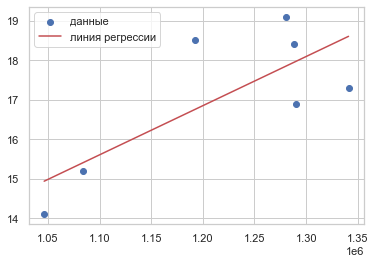

In [38]:
plt.scatter(X, y, label = 'данные')
plt.plot(X, res.intercept + res.slope * X, 'r', label = 'линия регрессии')
plt.legend()
plt.show()

#### Коэффициент детерминации и график линейной регрессии показывает не  сильную, но имеющуюся взаимосвязь смертности и объема потребления алкоголя